In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from statsmodels.api import OLS, add_constant

PC1: [0.70710678 0.70710678]
PC2: [-0.70710678  0.70710678]


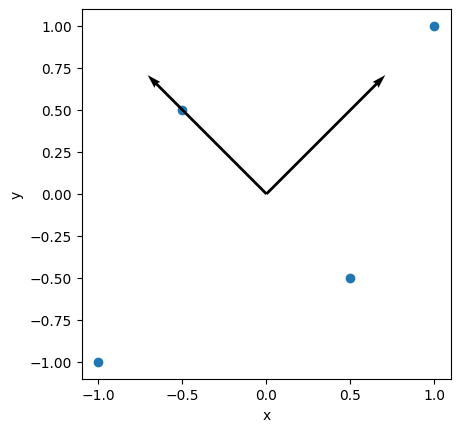

In [2]:
x = np.array(
    [
        [1, 1],
        [-1, -1],
        [0.5, -0.5],
        [-0.5, 0.5],
    ]
)

x_centered = x - np.mean(x, axis=0)
cov_matrix = x_centered.T @ x_centered / (x.shape[0] - 1)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

pc1 = eigenvectors[:, -1]
pc2 = eigenvectors[:, -2]
print("PC1:", pc1)
print("PC2:", pc2)

plt.scatter(x[:, 0], x[:, 1])
plt.quiver(0, 0, pc1[0], pc1[1], angles='xy', scale_units='xy', scale=1, color='k', label='PC1')
plt.quiver(0, 0, pc2[0], pc2[1], angles='xy', scale_units='xy', scale=1, color='k', label='PC2')
plt.axis('square')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
data_train = pd.read_csv('Data/molecular_train_gbc_cat.csv')
data_test = pd.read_csv('Data/molecular_test_gbc_cat.csv')

X_train = data_train.drop(columns=['label'])
y_train = data_train['label']
X_test = data_test.drop(columns=['label'])
y_test = data_test['label']

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

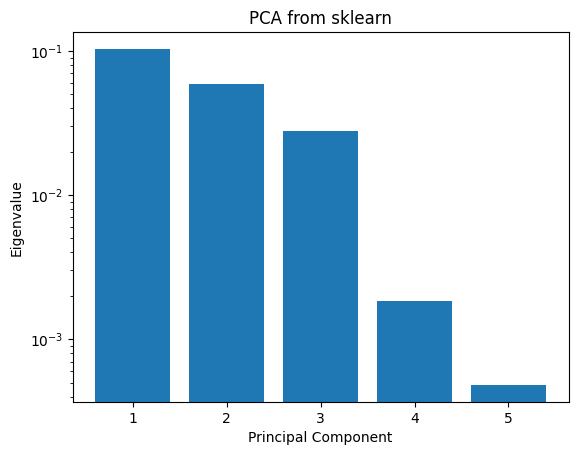

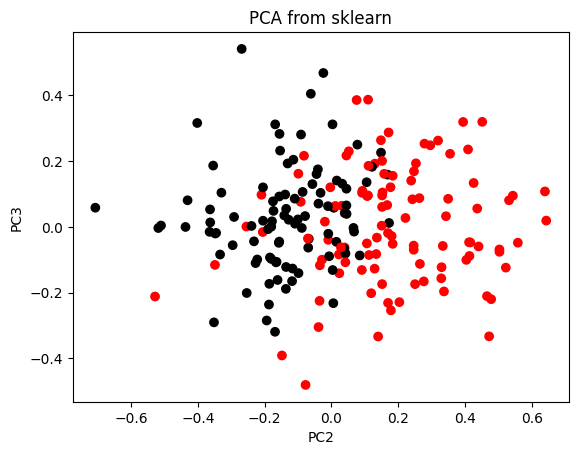

In [4]:
pca = PCA(n_components=5)
pca.fit(X_train)
X_eigen = pca.transform(X_test)

plt.figure()
plt.bar(range(1, 6), pca.explained_variance_)
plt.yscale('log')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('PCA from sklearn')
plt.show()

plt.figure()
colors = ['red' if y == 'Toxic' else 'black' for y in y_test]
plt.scatter(X_eigen[:, 1], X_eigen[:, 2], c=colors)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PCA from sklearn')
plt.show()

In [ ]:
class MyPCA1:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.n_samples_ = X.shape[0]
        X_centered = X - self.mean_
        cov_matrix = X_centered.T @ X_centered / (self.n_samples_ - 1)
        eigenvalues, eigenvectors = ...
        self.components_ = eigenvectors[:, ::-1].T
        self.explained_variance_ = eigenvalues[::-1]
        self.explained_variance_ratio_ = (
            self.explained_variance_ / np.sum(self.explained_variance_)
        )

    def transform(self, X):
        X_centered = X - self.mean_
        X_transformed = X_centered @ self.components_.T
        return X_transformed

pca = MyPCA1()
pca.fit(X_train)
X_eigen = pca.transform(X_test)

plt.figure()
plt.bar(range(1, 6), pca.explained_variance_)
plt.yscale('log')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('PCA by eigendecomposition')
plt.show()

plt.figure()
colors = ['red' if y == 'Toxic' else 'black' for y in y_test]
plt.scatter(X_eigen[:, 1], X_eigen[:, 2], c=colors)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PCA by eigendecomposition')
plt.show()

In [ ]:
class MyPCA2:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.n_samples_ = X.shape[0]
        X_centered = X - self.mean_
        U, S, VT = ...
        self.components_ = VT
        self.explained_variance_ = (S ** 2) / (self.n_samples_ - 1)
        self.explained_variance_ratio_ = (
            self.explained_variance_ / np.sum(self.explained_variance_)
        )
        
    def transform(self, X):
        X_centered = X - self.mean_
        return X_centered @ self.components_.T

pca = MyPCA2()
pca.fit(X_train)
X_eigen = pca.transform(X_test)

plt.figure()
plt.bar(range(1, 6), pca.explained_variance_)
plt.yscale('log')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('PCA by singular value decomposition')
plt.show()

plt.figure()
colors = ['red' if y == 'Toxic' else 'black' for y in y_test]
plt.scatter(X_eigen[:, 1], X_eigen[:, 2], c=colors)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PCA by singular value decomposition')
plt.show()

In [7]:
data_train = pd.read_csv('Data/molecular_train_gbc.csv')
data_test = pd.read_csv('Data/molecular_test_gbc.csv')

scaler = MinMaxScaler()
data_train = pd.DataFrame(scaler.fit_transform(data_train), columns=data_train.columns)
data_test = pd.DataFrame(scaler.transform(data_test), columns=data_test.columns)

X_train = data_train.drop(columns=['toxicity_score'])
y_train = data_train['toxicity_score']
X_test = data_test.drop(columns=['toxicity_score'])
y_test = data_test['toxicity_score']

X_train_const = add_constant(X_train)
X_test_const = add_constant(X_test)

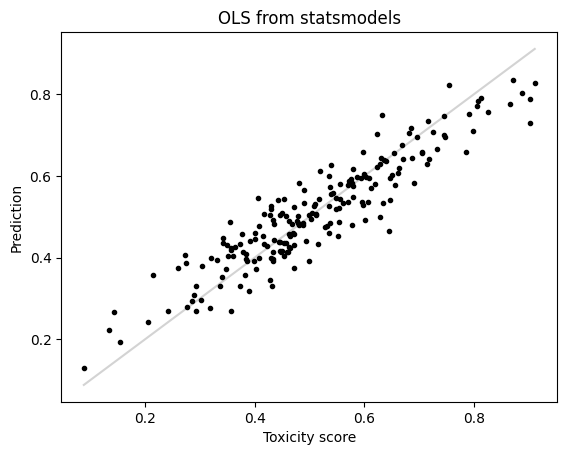

In [8]:
model = OLS(y_train, X_train_const).fit()
y_test_pred = model.predict(X_test_const)
plt.figure()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'lightgray')
plt.plot(y_test, y_test_pred, '.k')
plt.xlabel('Toxicity score')
plt.ylabel('Prediction')
plt.title('OLS from statsmodels')
plt.show()

In [ ]:
class MyOLS1:
    def fit(self, X, y):
        X_pinv = ...
        self.coef_ = ...

    def predict(self, X):
        return X @ self.coef_
    
model = MyOLS1()
model.fit(X_train_const.to_numpy(), y_train)
y_test_pred = model.predict(X_test_const.to_numpy())

plt.figure()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'lightgray')
plt.plot(y_test, y_test_pred, '.k')
plt.xlabel('Toxicity score')
plt.ylabel('Prediction')
plt.title('OLS by pseudoinverse')
plt.show()

In [ ]:
class MyOLS2:
    def fit(self, X, y):
        U, S, VT = np.linalg.svd(X)
        S_pinv = np.zeros_like(X.T)
        S_pinv[np.arange(min(X.shape)), np.arange(min(X.shape))] = ...
        self.coef_ = ...

    def predict(self, X):
        return X @ self.coef_
    
model = MyOLS2()
model.fit(X_train_const.to_numpy(), y_train)
y_test_pred = model.predict(X_test_const.to_numpy())

plt.figure()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'lightgray')
plt.plot(y_test, y_test_pred, '.k')
plt.xlabel('Toxicity score')
plt.ylabel('Prediction')
plt.title('OLS by singular value decomposition')
plt.show()